<a href="https://colab.research.google.com/github/GiovanaThais/arqPython/blob/master/Atividade_Avaliativa_Big_Data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explorando Redes Neurais e Teoria dos Grafos nas Redes Sociais**

Objetivo: O objetivo desta atividade é permitir que os alunos explorem o conceito de redes neurais e sua aplicabilidade na análise de redes sociais, combinando-o com a teoria dos grafos. Os alunos deverão implementar algoritmos em Python para construir e analisar redes neurais e grafos da rede social Facebook.

Relatório descrevendo as etapas realizadas, os resultados obtidos e as conclusões tiradas.

https://docs.google.com/document/d/1otQ6_9yLIhMH7r-jAEC65gQqPm1VTT2bgcdpqH89ILQ/edit

In [ ]:
# for some basic operations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for network visualizations
import networkx as nx

#
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import random

## a) Implementação de Rede Neural:
Utilizando a biblioteca TensorFlow ou PyTorch, implemente uma rede neural artificial (RNA) para um problema de classificação ou regressão. O conjunto de dados pode ser escolhido pelos alunos, mas é recomendado que seja relacionado a redes sociais (por exemplo, análise de sentimentos em tweets). Treine a RNA e avalie seu desempenho utilizando métricas apropriadas (por exemplo, acurácia, precisão, recall, F1-score).

In [ ]:
df_iris = pd.read_csv("/content/iris.csv")

In [ ]:
df_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df_iris['species_variety'] = df_iris['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})

In [ ]:
df_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,species_variety
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [ ]:
#Lista o index que representa a referencia as espécies.
labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

X = df_iris.iloc[:, 0:4].values  # Valores de entrada.
y = df_iris.iloc[:, 5].values    # Valores de saida(variação das espécies)

#Utilizando o scikit-learn para dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state=42)

#Convertendo os conjuntos de dados de treinamento e teste de NumPy arrays para tensores do PyTorch
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#Definindo rede neural com três camadas
class NeuralNet(nn.Module):

    def __init__(self, in_features=4, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features=in_features,
                             out_features=120)
        self.fc2 = nn.Linear(in_features=120,
                             out_features=84)
        self.fc3 = nn.Linear(in_features=84,
                             out_features=out_features)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        return self.fc3(X)

model = NeuralNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 50
losses = []
for i in range(epochs):
    i += 1

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    losses.append(loss)

    if i % 10 == 0:
        print(f'epoch: {i} -> loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 10 -> loss: 0.47085171937942505
epoch: 20 -> loss: 0.20908886194229126
epoch: 30 -> loss: 0.08128765970468521
epoch: 40 -> loss: 0.06586859375238419
epoch: 50 -> loss: 0.06294427812099457


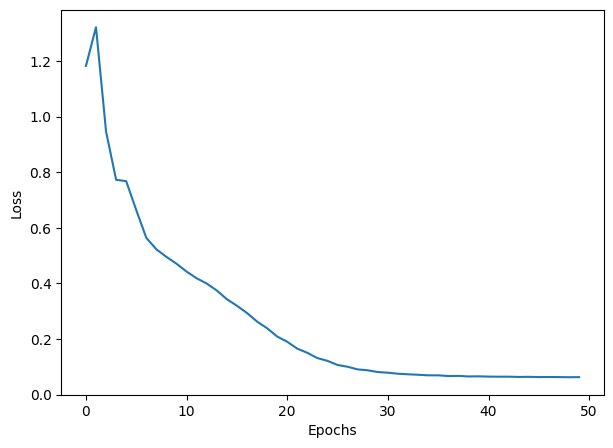

In [ ]:
loss_values = [loss.item() if torch.is_tensor(loss) else loss for loss in losses]

plt.figure(figsize=(7, 5))
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Este trecho de código realiza o seguinte:

Calcula as previsões da RNA no conjunto de teste (y_pred_test).
Obtém as classes previstas escolhendo a classe com a maior probabilidade de saída (torch.max(y_pred_test, 1)).
Converte os tensores PyTorch para NumPy arrays.
Calcula e imprime as métricas de avaliação, incluindo acurácia, precisão, recall e F1-score usando funções do scikit-learn.

In [ ]:
# Avaliação no conjunto de teste
with torch.no_grad():
    y_pred_test = model(X_test)
    _, predicted_labels = torch.max(y_pred_test, 1)  # Obtém as previsões finais

# Converte os tensores para NumPy arrays
y_test_np = y_test.numpy()
predicted_labels_np = predicted_labels.numpy()

# Métricas de avaliação
accuracy = accuracy_score(y_test_np, predicted_labels_np)
precision = precision_score(y_test_np, predicted_labels_np, average='weighted')
recall = recall_score(y_test_np, predicted_labels_np, average='weighted')
f1 = f1_score(y_test_np, predicted_labels_np, average='weighted')

print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 1.0000
Precisão: 1.0000
Recall: 1.0000
F1-score: 1.0000


## **b)** Construção de Grafo de Rede Social:
Utilizando a biblioteca NetworkX, construa um grafo que represente uma rede social. Os alunos podem utilizar um conjunto de dados real ou criar um grafo sintético.
No grafo, cada nó representa um indivíduo e as arestas representam conexões sociais (por exemplo, amizades, seguidores, relações profissionais).
Adicione atributos aos nós e/ou arestas, como idade, gênero, número de seguidores, etc.

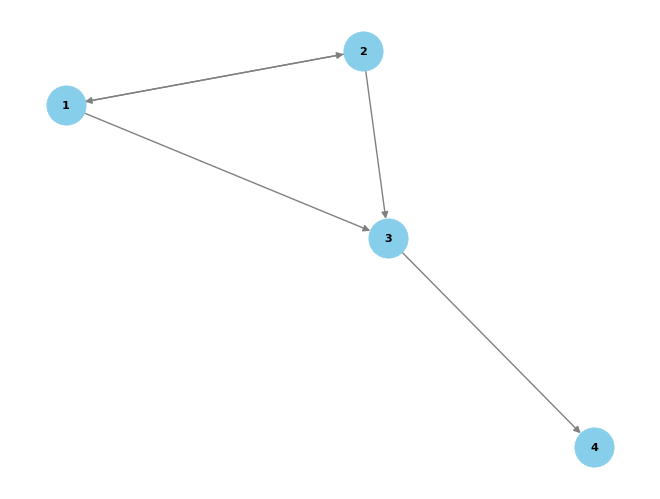

In [ ]:
# Criando um grafo direcionado
social_network = nx.DiGraph()

# Adicionando nós com atributos
nodes_attributes = {
    1: {'name': 'Alice', 'age': 25, 'gender': 'Female', 'followers': 300},
    2: {'name': 'Bob', 'age': 30, 'gender': 'Male', 'followers': 500},
    3: {'name': 'Charlie', 'age': 28, 'gender': 'Male', 'followers': 200},
    4: {'name': 'David', 'age': 22, 'gender': 'Male', 'followers': 100},
}

social_network.add_nodes_from(nodes_attributes)

# Adicionando arestas (conexões sociais)
edges = [(1, 2), (1, 3), (2, 1), (2, 3), (3, 4)]
social_network.add_edges_from(edges)

# Visualizando o grafo
pos = nx.spring_layout(social_network)
nx.draw(social_network, pos, with_labels=True, font_weight='bold', node_size=800, node_color='skyblue', font_size=8, font_color='black', edge_color='gray', linewidths=0.5, arrowsize=10)

# Adicionando rótulos aos nós
node_labels = nx.get_node_attributes(social_network, 'name')
nx.draw_networkx_labels(social_network, pos, labels=node_labels)

plt.show()

## **c)** Análise e Visualização do Grafo:
Realize análises sobre o grafo construído, como medidas de centralidade, detecção de comunidades, caminhos mínimos, etc.
Utilize bibliotecas como NetworkX e Matplotlib para visualizar o grafo e as análises realizadas.
Cada grupo deverá preparar um relatório descrevendo as etapas realizadas, os resultados obtidos e as conclusões tiradas.

In [ ]:
# Análises do Grafo
# Medidas de Centralidade
degree_centrality = nx.degree_centrality(social_network)
closeness_centrality = nx.closeness_centrality(social_network)
betweenness_centrality = nx.betweenness_centrality(social_network)

# Detecção de Comunidades
communities = list(nx.community.girvan_newman(social_network))

# Caminhos Mínimos
shortest_path = nx.shortest_path(social_network, source=1, target=4)

# Imprimir Resultados
print("Medidas de Centralidade:")
print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)

print("\nDetecção de Comunidades:")
for i, community in enumerate(communities):
    print(f"Comunidade {i + 1}: {community}")

print("\nCaminho Mínimo de 1 para 4:")
print("Shortest Path:", shortest_path)

Medidas de Centralidade:
Degree Centrality: {1: 1.0, 2: 1.0, 3: 1.0, 4: 0.3333333333333333}
Closeness Centrality: {1: 0.3333333333333333, 2: 0.3333333333333333, 3: 0.6666666666666666, 4: 0.6}
Betweenness Centrality: {1: 0.0, 2: 0.0, 3: 0.3333333333333333, 4: 0.0}

Detecção de Comunidades:
Comunidade 1: ({1, 2, 3}, {4})
Comunidade 2: ({1}, {2, 3}, {4})
Comunidade 3: ({1}, {2}, {3}, {4})

Caminho Mínimo de 1 para 4:
Shortest Path: [1, 3, 4]


Este código realiza análises como medidas de centralidade, detecção de comunidades usando o algoritmo Girvan-Newman e cálculo do caminho mínimo entre dois nós. Você pode adicionar ou personalizar análises conforme necessário para o seu relatório. Certifique-se de interpretar os resultados e tirar conclusões relevantes para a sua rede social simulada.